In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

In [3]:
# Read the JSON file
with open('data_spotify.json', 'r') as file:
    data = json.load(file)

# Create a list to store all artists
all_artists = []

# Process each time range
for time_range in ['short_term', 'medium_term', 'long_term']:
    # Check if time range exists in data
    if time_range in data:
        # Access artists array within the time range
        for artist in data[time_range]['artists']:
            artist_info = {
                'time_range': time_range,
                'name': artist['name'],
                'popularity': artist['popularity'], 
                'followers': artist['followers'],
                'genres': ', '.join(artist['genres']),
                'spotify_url': artist['spotify_url'],
                'spotify_id': artist['id'],
                'playlist_appearances': artist['statistics']['playlist_appearances'],
                'recent_plays': artist['statistics']['recent_plays'],
                'saved_tracks': artist['statistics']['saved_tracks'],
                'total_listening_time': artist['statistics']['total_listening_time'],
                'appears_in_top_tracks': artist['statistics']['appears_in_top_tracks']
            }
            all_artists.append(artist_info)

# Create DataFrame
df = pd.DataFrame(all_artists)

# Display the first few rows and basic information
print("First few rows of the DataFrame:")
display(df.head())

print("\nDataFrame Information:")
display(df.info())

First few rows of the DataFrame:


,time_range,name,popularity,followers,genres,spotify_url,spotify_id,playlist_appearances,recent_plays,saved_tracks,total_listening_time,appears_in_top_tracks
0,short_term,Nujabes,67,1269350,"downtempo, instrumental hip hop, japanese chil...",https://open.spotify.com/artist/3Rq3YOF9YG9YfC...,3Rq3YOF9YG9YfCWD4D56RZ,0,19,0,4458148,5
1,short_term,Coldplay,91,55499015,"permanent wave, pop",https://open.spotify.com/artist/4gzpq5DPGxSnKT...,4gzpq5DPGxSnKTe4SA8HAU,0,0,0,0,1
2,short_term,Mitski,84,9581191,"brooklyn indie, pov: indie",https://open.spotify.com/artist/2uYWxilOVlUdk4...,2uYWxilOVlUdk4oV9DvwqK,0,11,1,2003583,2
3,short_term,Anar,68,177729,phonk brasileiro,https://open.spotify.com/artist/4C5EDmZfgkkSwU...,4C5EDmZfgkkSwUVFSvuUNP,0,0,0,0,1
4,short_term,Billie Eilish,96,104255645,"art pop, pop",https://open.spotify.com/artist/6qqNVTkY8uBg9c...,6qqNVTkY8uBg9cP3Jd7DAH,0,0,0,0,1



DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   time_range             150 non-null    object
 1   name                   150 non-null    object
 2   popularity             150 non-null    int64 
 3   followers              150 non-null    int64 
 4   genres                 150 non-null    object
 5   spotify_url            150 non-null    object
 6   spotify_id             150 non-null    object
 7   playlist_appearances   150 non-null    int64 
 8   recent_plays           150 non-null    int64 
 9   saved_tracks           150 non-null    int64 
 10  total_listening_time   150 non-null    int64 
 11  appears_in_top_tracks  150 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 14.2+ KB


None

In [ ]:
# Display only the artist name and time range columns without truncating rows
pd.set_option('display.max_rows', None)
display(df[['name', 'time_range']])
pd.reset_option('display.max_rows')


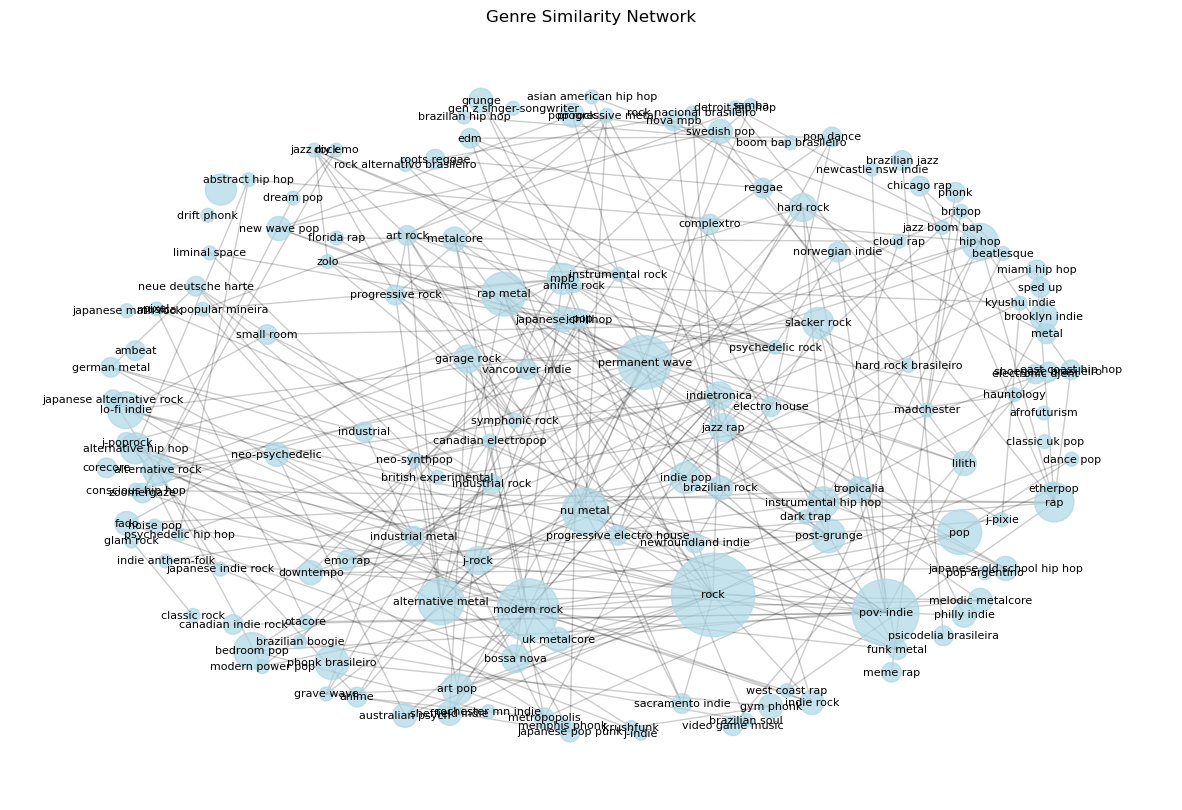

In [4]:
# Create a list of all unique genres
all_genres = []
for genres_str in df['genres']:
    genres = [g.strip() for g in genres_str.split(',')]
    all_genres.extend(genres)
all_genres = list(set(all_genres))

# Create a matrix of artist-genre relationships
genre_matrix = np.zeros((len(df), len(all_genres)))
for i, genres_str in enumerate(df['genres']):
    genres = [g.strip() for g in genres_str.split(',')]
    for genre in genres:
        j = all_genres.index(genre)
        genre_matrix[i, j] = 1

# Calculate genre similarity using cosine similarity
genre_similarity = cosine_similarity(genre_matrix.T)

# Create a network graph
G = nx.Graph()

# Add nodes (genres)
for genre in all_genres:
    G.add_node(genre)

# Add edges based on similarity threshold
threshold = 0.2  # Adjust this value to change the connectivity
for i in range(len(all_genres)):
    for j in range(i + 1, len(all_genres)):
        if genre_similarity[i, j] > threshold:
            G.add_edge(all_genres[i], all_genres[j], weight=genre_similarity[i, j])

# Set up the plot
plt.figure(figsize=(15, 10))

# Calculate node sizes based on genre frequency
genre_counts = Counter(g.strip() for genres in df['genres'] for g in genres.split(','))
node_sizes = [genre_counts[genre] * 100 for genre in all_genres]

# Draw the network
pos = nx.spring_layout(G, k=1, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Genre Similarity Network")
plt.axis('off')
plt.show()


In [5]:
# Find artists that appear in multiple time ranges
artist_counts = df['name'].value_counts()
repeated_artists = artist_counts[artist_counts > 1]

print("\nArtists appearing in multiple time ranges:")
print(repeated_artists)



Artists appearing in multiple time ranges:
name
Nujabes                     3
Current Joys                3
Coldplay                    3
Tame Impala                 3
Bring Me The Horizon        3
TV Girl                     3
The Cardigans               3
Gorillaz                    3
MGMT                        3
Arctic Monkeys              3
Alex G                      3
System Of A Down            3
Nirvana                     3
Mitski                      3
Anar                        3
Billie Eilish               3
Linkin Park                 3
Chico Buarque               3
girl in red                 2
INTERWORLD                  2
Imagine Dragons             2
ASIAN KUNG-FU GENERATION    2
Terno Rei                   2
Kanye West                  2
MF DOOM                     2
Pretty Sick                 2
Ghost                       2
Porter Robinson             2
Clairo                      2
XXXTENTACION                2
Deftones                    2
Freddie Dredd        